## Lotka-Volterra predator-prey system

This notebook simulates the Lotka-Volterra system defined in `data.lotka_volterra_spec` and visualizes a trajectory and the phase portrait.

Parameters: alpha=beta=gamma=delta=0.2; initial conditions sampled uniformly from [0.02, 3.0]^2.


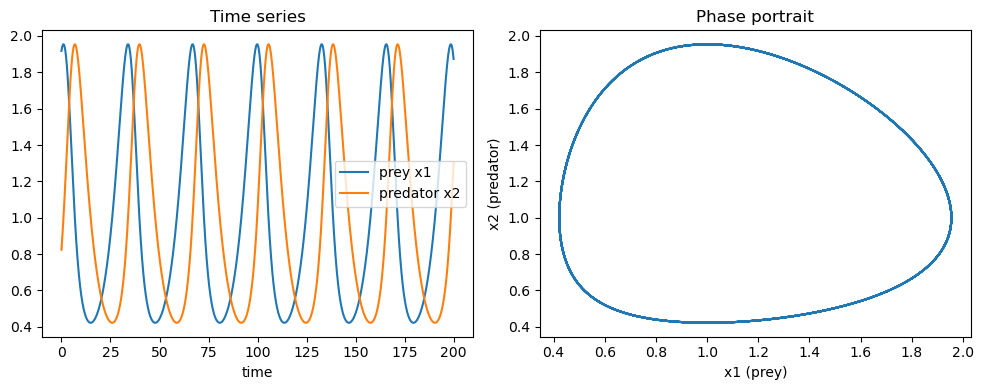

In [6]:
import os, sys
sys.path.insert(0, os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt

from data import lotka_volterra_spec, rk4_step

spec = lotka_volterra_spec()
rng = np.random.default_rng(0)

# Simulation params
T = 200.0
dt = 0.01
steps = int(T / dt)

state = spec.init_sampler(rng).astype(np.float32)
traj = np.zeros((steps, 2), dtype=np.float32)
for k in range(steps):
    traj[k] = state
    state = rk4_step(spec.dynamics, k * dt, state, dt)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

t = np.arange(steps) * dt
axes[0].plot(t, traj[:, 0], label='prey x1')
axes[0].plot(t, traj[:, 1], label='predator x2')
axes[0].set_xlabel('time')
axes[0].legend()
axes[0].set_title('Time series')

axes[1].plot(traj[:, 0], traj[:, 1])
axes[1].set_xlabel('x1 (prey)')
axes[1].set_ylabel('x2 (predator)')
axes[1].set_title('Phase portrait')

plt.tight_layout()
plt.show()
